In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('gurgaon_properties_outlier_treated.csv')

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,signature global park 4,sector 36,0.82,7586.0,1081.00,Super Built up area 1081(100.43 sq.m.)Carpet a...,3.0,2.0,2,2.0,NaN,New Property,1081.0,NaN,650.00,0.0,0.0,0.0,0.0,0.0,0.0,8.0,360.333333
1,flat,smart world gems,sector 89,0.95,8597.0,1105.00,Carpet area: 1103 (102.47 sq.m.),2.0,2.0,2,4.0,NaN,New Property,NaN,NaN,1103.00,1.0,1.0,0.0,0.0,0.0,0.0,38.0,552.500000
2,flat,pyramid elite,sector 86,0.46,6751.0,681.41,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,681.41,581.41,0.0,0.0,0.0,0.0,0.0,0.0,15.0,340.705000
3,flat,breez global hill view,sohna road,0.32,5470.0,585.00,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2.0,2.0,1,17.0,NaN,New Property,NaN,1000.00,585.00,0.0,0.0,0.0,0.0,0.0,0.0,49.0,292.500000
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.00,Super Built up area 1995(185.34 sq.m.)Built Up...,3.0,4.0,3+,10.0,North-West,Relatively New,1995.0,1615.00,1476.00,0.0,1.0,0.0,0.0,1.0,1.0,174.0,665.000000


In [5]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1014
agePossession             0
super_built_up_area    1691
built_up_area          1966
carpet_area            1716
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

## Built up Area

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='built_up_area', ylabel='super_built_up_area'>

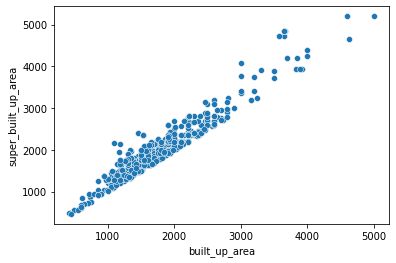

In [6]:
sns.scatterplot(df['built_up_area'], df['super_built_up_area'])

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='built_up_area', ylabel='carpet_area'>

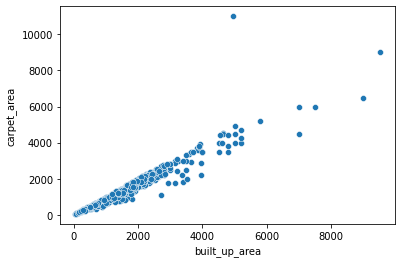

In [7]:
sns.scatterplot(df['built_up_area'], df['carpet_area'])

In [9]:
df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio


In [15]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [28]:
all_present_df

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3.0,4.0,3+,10.0,North-West,Relatively New,1995.0,1615.00,1476.00,0.0,1.0,0.0,0.0,1.0,1.0,174.0,665.000000
17,flat,ss the leaf,sector 85,1.09,6667.0,1635.0,Super Built up area 1640(152.36 sq.m.)Built Up...,2.0,2.0,3,9.0,South-West,Relatively New,1640.0,1638.00,1635.00,0.0,0.0,1.0,0.0,0.0,0.0,174.0,817.500000
18,flat,capital residences 360,sector 70a,1.15,11500.0,1000.0,Super Built up area 1450(134.71 sq.m.)Built Up...,2.0,2.0,3,4.0,East,New Property,1450.0,1400.00,1000.00,0.0,0.0,0.0,1.0,0.0,0.0,132.0,500.000000
33,flat,emaar mgf the palm drive,sector 66,3.50,15909.0,2200.0,Super Built up area 2200(204.39 sq.m.)Built Up...,3.0,3.0,3,7.0,North-East,Moderately Old,2200.0,2125.00,2000.00,0.0,1.0,1.0,0.0,0.0,1.0,149.0,733.333333
35,flat,dlf the skycourt,sector 86,1.54,9222.0,1670.0,Super Built up area 1929(179.21 sq.m.)Built Up...,3.0,3.0,3+,15.0,North-West,Relatively New,1929.0,1780.00,1670.00,0.0,1.0,0.0,0.0,0.0,0.0,174.0,556.666667
44,flat,la vida by tata housing,sector 113,3.00,14286.0,2100.0,Super Built up area 2691(250 sq.m.)Built Up ar...,3.0,3.0,3+,3.0,East,Relatively New,2691.0,2460.00,2100.00,0.0,1.0,0.0,0.0,0.0,0.0,167.0,700.000000
54,flat,m3m skywalk,sector 74,1.50,12500.0,1200.0,Super Built up area 1400(130.06 sq.m.)Built Up...,2.0,2.0,3,17.0,North-East,Relatively New,1400.0,1300.00,1200.00,0.0,0.0,1.0,0.0,0.0,0.0,174.0,600.000000
56,flat,experion the heartsong,sector 108,1.65,8238.0,2003.0,Super Built up area 2003(186.08 sq.m.)Built Up...,3.0,4.0,3,3.0,North-West,Moderately Old,2003.0,1771.32,1302.01,1.0,0.0,0.0,0.0,0.0,1.0,75.0,667.666667
58,flat,shri balaji apartment,sector 12,0.35,4037.0,867.0,Super Built up area 867(80.55 sq.m.)Built Up a...,2.0,2.0,1,1.0,North,Moderately Old,867.0,737.00,650.00,0.0,0.0,0.0,0.0,0.0,0.0,23.0,433.500000
60,flat,ss the leaf,sector 85,1.12,6452.0,1736.0,Super Built up area 1741(161.74 sq.m.)Built Up...,2.0,2.0,3,10.0,East,Relatively New,1741.0,1485.00,1335.00,0.0,0.0,0.0,0.0,1.0,0.0,49.0,868.000000


In [16]:
all_present_df.shape

(531, 24)

In [18]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [19]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [20]:
print(super_to_built_up_ratio)
print(carpet_to_built_up_ratio)

1.105263157894737
0.9


In [29]:
#Super_built_up area is present ,carpet_area is present and built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [30]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,signature global park 4,sector 36,0.82,7586.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3.0,2.0,2,2.0,NaN,New Property,1081.0,NaN,650.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,360.333333
5,flat,suncity avenue,sector 102,0.48,9023.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2.0,2.0,1,5.0,North-East,Relatively New,632.0,NaN,532.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0,266.000000
39,flat,corona optus,sector 37,1.25,7176.0,1742.0,Super Built up area 1735(161.19 sq.m.)Carpet a...,3.0,3.0,3,2.0,North-West,Relatively New,1735.0,NaN,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,49.0,580.666667
41,flat,m3m merlin,sector 67,2.80,13679.0,2047.0,Super Built up area 2047(190.17 sq.m.)Carpet a...,3.0,3.0,3,5.0,North-East,Moderately Old,2047.0,NaN,1880.0,0.0,1.0,0.0,0.0,0.0,2.0,26.0,682.333333
46,flat,smart world orchard,sector 61,2.10,13752.0,1527.0,Super Built up area 1549(143.91 sq.m.)Carpet a...,3.0,2.0,3,3.0,South,Under Construction,1549.0,NaN,1500.0,0.0,0.0,0.0,0.0,0.0,0.0,146.0,509.000000


In [32]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

<ipython-input-32-a2fefc960aa3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)


In [33]:
df.update(sbc_df)

In [34]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1014
agePossession             0
super_built_up_area    1691
built_up_area          1545
carpet_area            1716
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [37]:
#super_built up area is present, carpet_area is null, built_up_area is null

sb_df = df[(~df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [38]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
6,flat,paras quartier,gwal pahari,7.50,14019.0,5350.0,Super Built up area 5350(497.03 sq.m.),4.0,4.0,3+,20.0,North-East,New Property,5350.0,NaN,NaN,0.0,1.0,0.0,1.0,1.0,1.0,49.0,1337.500000
7,flat,experion the heartsong,sector 108,2.00,8554.0,2338.0,Super Built up area 2338(217.21 sq.m.),3.0,3.0,3+,14.0,East,Relatively New,2338.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,95.0,779.333333
8,flat,adani m2k oyster grande,sector 102,1.90,9104.0,2087.0,Super Built up area 1889(175.49 sq.m.),3.0,4.0,3,8.0,North-East,Relatively New,1889.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,165.0,695.666667
13,flat,ats tourmaline,sector 109,2.25,8704.0,2585.0,Super Built up area 2585(240.15 sq.m.),3.0,4.0,3,14.0,North-East,Relatively New,2585.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,101.0,861.666667
16,flat,bestech park view sanskruti,sector 92,1.55,7568.0,2048.0,Super Built up area 1995(185.34 sq.m.),3.0,4.0,3,16.0,South,Relatively New,1995.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,1.0,60.0,682.666667


In [39]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105), inplace=True)

<ipython-input-39-92a07232d22d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105), inplace=True)


In [40]:
df.update(sb_df)

In [41]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1014
agePossession             0
super_built_up_area    1691
built_up_area           670
carpet_area            1716
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [43]:
#super_built_up area is null, carpet area is present and built_up_area is null.

c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [46]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
1,flat,smart world gems,sector 89,0.95,8597.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2.0,2.0,2,4.0,NaN,New Property,NaN,NaN,1103.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0,552.50
12,flat,dlf regency park,sector 28,1.60,14545.0,1100.0,Carpet area: 1100 (102.19 sq.m.),2.0,2.0,2,3.0,North,Relatively New,NaN,NaN,1100.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,550.00
14,flat,emaar mgf emerald floors premier,sector 65,2.77,14025.0,1975.0,Carpet area: 1975 (183.48 sq.m.),4.0,4.0,3+,3.0,North-East,Relatively New,NaN,NaN,1975.0,1.0,1.0,0.0,0.0,0.0,2.0,174.0,493.75
20,flat,afnhb jalvayu vihar,sector 30,0.85,12859.0,661.0,Carpet area: 661 (61.41 sq.m.),2.0,2.0,1,2.0,West,Old Property,NaN,NaN,661.0,0.0,0.0,0.0,0.0,1.0,1.0,49.0,330.50
26,flat,chanderlok society,sector 28,0.90,7235.0,1244.0,Carpet area: 1244 (115.57 sq.m.),4.0,2.0,3+,1.0,NaN,Old Property,NaN,NaN,1244.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,311.00


In [47]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9), inplace=True)

<ipython-input-47-7967fc28c3de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9), inplace=True)


In [48]:
df.update(c_df)

In [49]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1014
agePossession             0
super_built_up_area    1691
built_up_area             0
carpet_area            1716
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='built_up_area', ylabel='price'>

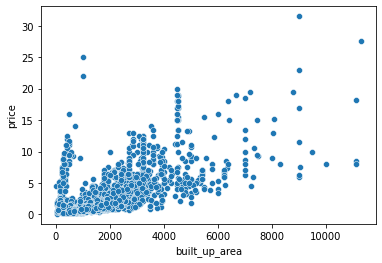

In [50]:
sns.scatterplot(df['built_up_area'], df['price'])

In [55]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [57]:
anamoly_df.sample(5)

,price,area,built_up_area
2709,2.57,1630.0,1811.0
1148,7.25,2471.0,303.0
379,4.75,2367.0,261.0
423,4.00,1503.0,1503.0
324,4.50,3240.0,360.0


In [58]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [59]:
df.update(anamoly_df)

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='built_up_area', ylabel='price'>

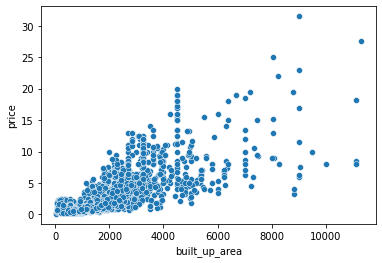

In [60]:
sns.scatterplot(df['built_up_area'], df['price'])

In [61]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'], inplace=True)

In [62]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,NaN,New Property,850.00,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,NaN,New Property,1226.00,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,pyramid elite,sector 86,0.46,6751.0,2.0,2.0,1,0.0,NaN,Under Construction,681.41,0.0,0.0,0.0,0.0,0.0,0.0,15.0
3,flat,breez global hill view,sohna road,0.32,5470.0,2.0,2.0,1,17.0,NaN,New Property,1000.00,0.0,0.0,0.0,0.0,0.0,0.0,49.0
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4.0,3+,10.0,North-West,Relatively New,1615.00,0.0,1.0,0.0,0.0,1.0,1.0,174.0


In [63]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1014
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

## Floor_Num

In [64]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
502,house,independent,sector 4,0.65,11111.0,4.0,2.0,2,NaN,NaN,Moderately Old,585.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
769,house,independent,sector 7,6.50,15046.0,3.0,2.0,3+,NaN,NaN,Old Property,4320.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
1297,house,independent,sector 3,1.50,10288.0,3.0,3.0,0,NaN,NaN,Old Property,210.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1455,house,vipul tatvam villa,sector 48,8.50,26235.0,4.0,4.0,1,NaN,NaN,Relatively New,3240.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0
1468,house,ansal sushant lok plots,sector 43,3.30,26570.0,1.0,1.0,0,NaN,NaN,Under Construction,1242.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1952,house,jacob pura,sector 12,0.35,9722.0,2.0,1.0,0,NaN,NaN,Old Property,360.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2055,house,vipul tatvam villa,sector 48,8.50,26235.0,4.0,4.0,2,NaN,East,Moderately Old,3240.0,0.0,1.0,1.0,1.0,0.0,0.0,88.0
2164,house,independent,sector 4,4.12,8889.0,2.0,1.0,3+,NaN,NaN,Moderately Old,4635.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2279,house,emaar mgf marbella,sector 66,9.00,21251.0,4.0,4.0,3+,NaN,South-West,Relatively New,5200.0,0.0,1.0,1.0,1.0,0.0,1.0,114.0
2448,house,dlf new town heights,sector 86,2.47,7719.0,4.0,4.0,3+,NaN,West,Moderately Old,2800.0,0.0,1.0,0.0,1.0,0.0,1.0,130.0


In [66]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [67]:
df['floorNum'].fillna(2.0, inplace=True)

In [68]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1014
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [69]:
1014/df.shape[0]

0.2842724978973928

## facing

In [94]:

df['facing'].value_counts().plot(kind='pie', autopct='%0.2f%%')

KeyError: 'facing'

In [71]:
df.drop(columns=['facing'], inplace=True)

In [72]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2354,flat,pareena coban residences,sector 99,1.38,7150.0,4.0,5.0,3+,1.0,Relatively New,2150.0,0.0,1.0,0.0,0.0,1.0,0.0,49.0
27,house,independent,sector 4,0.40,8889.0,1.0,1.0,0,1.0,Moderately Old,450.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
819,house,independent,sohna road,0.95,8920.0,3.0,10.0,3+,3.0,New Property,1065.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1860,flat,ats tourmaline,sector 109,1.72,8000.0,3.0,4.0,3+,7.0,Relatively New,1797.0,0.0,1.0,0.0,0.0,0.0,0.0,167.0
1315,flat,dlf the ultima,sector 81,2.40,11412.0,3.0,3.0,3+,12.0,Relatively New,1650.0,0.0,1.0,0.0,0.0,0.0,2.0,49.0


In [73]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [77]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2546,flat,NaN,sector 78,0.6,3692.0,2.0,2.0,0,2.0,Under Construction,1625.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
df.drop(index=[2546], inplace=True)

In [79]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

## agePossession

In [80]:
df['agePossession'].value_counts()

Relatively New        1612
New Property           561
Moderately Old         545
Old Property           293
Undefined              291
Under Construction     264
Name: agePossession, dtype: int64

In [84]:
age =df[df['agePossession'] == 'Undefined']

In [139]:
age.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
11,house,independent,sector 109,1.55,6568.0,3.0,2.0,0,1.0,Undefined,2360.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,house,greenopolis,sector 89,0.70,5397.0,2.0,2.0,2,14.0,Undefined,1297.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49,flat,smart world gems,sector 89,1.71,12000.0,3.0,2.0,0,3.0,Under Construction,1423.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
71,flat,rof aalayas,sector 102,0.45,6000.0,1.0,1.0,2,6.0,Undefined,750.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75,house,bhim garh kheri,sector 3,1.50,7576.0,7.0,2.0,0,1.0,Undefined,1980.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
age['society'].value_counts()

independent                                85
smart world gems                            5
dlf the arbour                              4
signature global park                       4
m3m heights                                 4
raheja vedaanta                             4
trisara our homes 3                         3
hcbs sports ville                           3
sare green parc                             3
central park flower valley                  3
ramsons kshitij                             3
sare crescent parc                          3
shapoorji pallonji joyville gurugram        3
sidhartha ncr one                           3
godrej nature plus                          3
assotech blith                              3
global hill view                            2
signature global orchard avenue             2
ashiana anmol                               2
dlf the grove                               2
umang winter hills                          2
godrej air                        

In [122]:
age[age['society'] == 'smart world gems'] #under construction

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
49,flat,smart world gems,sector 89,1.71,12000.0,3.0,2.0,0,3.0,Under Construction,1423.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
491,flat,smart world gems,sector 89,1.10,9973.0,3.0,1.0,0,0.0,Under Construction,1103.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
1018,flat,smart world gems,sector 89,1.20,8433.0,3.0,3.0,2,2.0,Under Construction,1423.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
1121,flat,smart world gems,sector 89,0.88,7978.0,2.0,2.0,0,2.0,Under Construction,1103.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
3324,flat,smart world gems,sector 89,0.90,8145.0,2.0,2.0,2,1.0,Under Construction,1105.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0


In [140]:
x = age[age['society'] == 'hcbs sports ville'] 
x['agePossession']=x['agePossession'].replace('Undefined', 'Relatively New')
age.update(x)

<ipython-input-140-91731157f498>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['agePossession']=x['agePossession'].replace('Undefined', 'Relatively New')
<ipython-input-140-91731157f498>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age.update(x)
<ipython-input-140-91731157f498>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [120]:
x.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
49,flat,smart world gems,sector 89,1.71,12000.0,3.0,2.0,0,3.0,Under Construction,1423.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
491,flat,smart world gems,sector 89,1.10,9973.0,3.0,1.0,0,0.0,Under Construction,1103.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
1018,flat,smart world gems,sector 89,1.20,8433.0,3.0,3.0,2,2.0,Under Construction,1423.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
1121,flat,smart world gems,sector 89,0.88,7978.0,2.0,2.0,0,2.0,Under Construction,1103.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
3324,flat,smart world gems,sector 89,0.90,8145.0,2.0,2.0,2,1.0,Under Construction,1105.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0


In [124]:
age[age['society'] == 'dlf the arbour'] #under construction

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
254,flat,dlf the arbour,sector 63,7.80,19747.0,4.0,4.0,0,6.0,Under Construction,3950.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0
356,flat,dlf the arbour,sector 63,8.50,21519.0,4.0,4.0,0,27.0,Under Construction,3950.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0
595,flat,dlf the arbour,sector 63,7.52,18999.0,4.0,4.0,3,15.0,Under Construction,3956.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0
2419,house,dlf the arbour,sector 63,8.50,21519.0,4.0,4.0,3+,27.0,Under Construction,3950.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0


In [126]:
age[age['society'] == 'signature global park'] #Relatively New

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
850,flat,signature global park,sohna road,0.55,6691.0,2.0,2.0,3,3.0,Relatively New,913.0,0.0,0.0,0.0,0.0,0.0,0.0,58.0
1914,flat,signature global park,sohna road,0.58,7056.0,2.0,2.0,2,3.0,Relatively New,822.0,0.0,0.0,0.0,0.0,0.0,0.0,58.0
2023,flat,signature global park,sohna road,0.75,6938.0,2.0,2.0,0,1.0,Relatively New,1081.0,0.0,0.0,0.0,0.0,0.0,0.0,58.0
3491,flat,signature global park,sohna road,0.87,7190.0,3.0,2.0,3,4.0,Relatively New,1210.0,0.0,0.0,0.0,0.0,0.0,0.0,58.0


In [128]:
age[age['society'] == 'm3m heights'] #Under Construction

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
276,flat,m3m heights,sector 65,2.00,13957.0,2.0,2.0,2,32.0,Under Construction,1433.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0
346,flat,m3m heights,sector 65,2.78,15200.0,3.0,3.0,3,44.0,Under Construction,1829.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
1255,flat,m3m heights,sector 65,2.15,15003.0,2.0,2.0,3+,28.0,Under Construction,1433.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0
3269,flat,m3m heights,sector 65,1.90,13991.0,2.0,2.0,2,40.0,Under Construction,1358.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0


In [133]:
age[age['society'] == 'raheja vedaanta']#moderately old

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
730,flat,raheja vedaanta,sector 108,1.5,5263.0,3.0,4.0,0,12.0,Moderately Old,2850.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2969,flat,raheja vedaanta,sector 108,1.0,4854.0,2.0,2.0,2,0.0,Moderately Old,2060.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3302,flat,raheja vedaanta,sector 108,0.7,4651.0,2.0,2.0,2,12.0,Moderately Old,1505.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3509,flat,raheja vedaanta,sector 108,0.7,4522.0,2.0,2.0,3,1.0,Moderately Old,1548.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
age[age['society'] == 'trisara our homes 3'] #underconstruction

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2424,flat,trisara our homes 3,sohna road,0.40,4479.0,2.0,2.0,2,1.0,Under Construction,900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2992,flat,trisara our homes 3,sohna road,0.21,4339.0,1.0,1.0,0,2.0,Under Construction,484.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3481,flat,trisara our homes 3,sohna road,0.38,6312.0,2.0,2.0,2,1.0,Under Construction,602.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [141]:

age[age['society'] == 'hcbs sports ville'] #Relatively New

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3086,flat,hcbs sports ville,sohna road,0.29,3973.0,2.0,2.0,1,4.0,Relatively New,743.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3334,flat,hcbs sports ville,sohna road,0.30,4011.0,2.0,2.0,2,3.0,Relatively New,743.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3463,flat,hcbs sports ville,sohna road,0.38,5067.0,2.0,2.0,2,9.0,Relatively New,750.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [145]:
age[age['society'] == 'sare green parc'] #Moderately Old

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1721,flat,sare green parc,sector 92,0.85,6538.0,3.0,2.0,2,20.0,Moderately Old,1300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2254,flat,sare green parc,sector 92,0.75,4820.0,3.0,2.0,2,16.0,Moderately Old,1556.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2744,flat,sare green parc,sector 92,0.85,6741.0,3.0,2.0,2,14.0,Moderately Old,1261.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
age.loc[age['society'] == 'sare green parc', 'agePossession'] = age.loc[age['society'] == 'sare green parc', 'agePossession'].replace('Undefined', 'Moderately Old')


In [148]:
age[age['society'] == 'central park flower valley'] #New Property

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
485,flat,central park flower valley,sector 33,2.50,13270.0,3.0,3.0,2,1.0,New Property,2093.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0
1129,flat,central park flower valley,sohna road,1.20,6742.0,3.0,3.0,0,11.0,New Property,1780.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0
1653,flat,central park flower valley,sohna road,1.65,17442.0,3.0,3.0,0,1.0,New Property,1051.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0


In [147]:
age.loc[age['society'] == 'central park flower valley', 'agePossession'] = age.loc[age['society'] == 'central park flower valley', 'agePossession'].replace('Undefined', 'New Property')


In [152]:
age[age['society'] == 'ramsons kshitij'] #Relatively New

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
202,flat,ramsons kshitij,sector 95,0.40,5839.0,3.0,2.0,2,6.0,Relatively New,761.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
343,flat,ramsons kshitij,sector 95,0.35,5495.0,2.0,2.0,0,5.0,Relatively New,637.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3019,flat,ramsons kshitij,sector 95,0.30,3158.0,2.0,2.0,1,11.0,Relatively New,950.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [151]:
age.loc[age['society'] == 'ramsons kshitij', 'agePossession'] = age.loc[age['society'] == 'ramsons kshitij', 'agePossession'].replace('Undefined', 'Relatively New')


In [156]:
age[age['society'] == 'sare crescent parc'] #New property

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1619,flat,sare crescent parc,sector 92,1.00,4778.0,4.0,4.0,3,9.0,New property,2093.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1891,flat,sare crescent parc,sector 92,0.95,5013.0,4.0,5.0,3+,13.0,New property,1895.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2778,flat,sare crescent parc,sector 92,0.82,5384.0,3.0,3.0,3+,12.0,New property,1523.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [155]:
age.loc[age['society'] == 'sare crescent parc', 'agePossession'] = age.loc[age['society'] == 'sare crescent parc', 'agePossession'].replace('Undefined', 'New property')


In [160]:
#shapoorji pallonji joyville gurugram 
age[age['society'] == 'shapoorji pallonji joyville gurugram'] #Newproperty

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1007,flat,shapoorji pallonji joyville gurugram,sector 102,1.42,10380.0,2.0,2.0,3,14.0,New property,1368.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1105,flat,shapoorji pallonji joyville gurugram,sector 102,0.95,10383.0,2.0,2.0,2,14.0,New property,915.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2239,flat,shapoorji pallonji joyville gurugram,sector 102,0.95,10383.0,2.0,2.0,2,14.0,New property,915.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [159]:
age.loc[age['society'] == 'shapoorji pallonji joyville gurugram', 'agePossession'] = age.loc[age['society'] == 'shapoorji pallonji joyville gurugram', 'agePossession'].replace('Undefined', 'New property')


In [163]:
#sidhartha ncr one
age[age['society'] == 'sidhartha ncr one'] #Moderately Old

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1076,flat,sidhartha ncr one,sector 95,0.55,5556.0,2.0,2.0,3,15.0,Moderately Old,990.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1497,flat,sidhartha ncr one,sector 95,0.56,4106.0,2.0,2.0,2,10.0,Moderately Old,1364.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3532,flat,sidhartha ncr one,sector 95,0.57,4179.0,2.0,2.0,2,10.0,Moderately Old,1364.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [162]:
age.loc[age['society'] == 'sidhartha ncr one', 'agePossession'] = age.loc[age['society'] == 'sidhartha ncr one', 'agePossession'].replace('Undefined', 'Moderately Old')


In [166]:
#godrej nature plus
age[age['society'] == 'godrej nature plus'] #Under Construction

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
306,flat,godrej nature plus,sector 33,1.10,7971.0,2.0,2.0,2,14.0,Under Construction,1533.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
3039,flat,godrej nature plus,sector 33,1.75,8768.0,3.0,3.0,0,2.0,Under Construction,1996.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
3374,flat,godrej nature plus,sector 33,1.25,9025.0,2.0,2.0,3,17.0,Under Construction,1385.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0


In [165]:
age.loc[age['society'] == 'godrej nature plus', 'agePossession'] = age.loc[age['society'] == 'godrej nature plus', 'agePossession'].replace('Undefined', 'Under Construction')


In [169]:
#assotech blith
age[age['society'] == 'assotech blith'] #'New property'

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1259,flat,assotech blith,sector 99,1.90,6702.0,4.0,4.0,3+,2.0,New property,2835.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0
2212,flat,assotech blith,sector 99,1.60,6667.0,3.0,4.0,0,15.0,New property,2400.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0
2669,flat,assotech blith,sector 99,0.82,6007.0,2.0,2.0,3,0.0,New property,1365.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0


In [168]:
age.loc[age['society'] == 'assotech blith', 'agePossession'] = age.loc[age['society'] == 'assotech blith', 'agePossession'].replace('Undefined', 'New property')


In [174]:
df.update(age)

In [175]:
df['agePossession'].value_counts()

Relatively New        1622
New Property           564
Moderately Old         555
Old Property           293
Under Construction     283
Undefined              240
New property             9
Name: agePossession, dtype: int64

In [185]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        #if mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [188]:
df['agePossession'] =df.apply(mode_based_imputation, axis=1)

In [194]:
df['agePossession'].value_counts()

Relatively New        1708
Moderately Old         595
New Property           589
Old Property           324
Under Construction     295
Undefined               55
Name: agePossession, dtype: int64

In [193]:
df['agePossession'].replace('New property', 'New Property', inplace=True)

In [195]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [196]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)


In [197]:
df['agePossession'].value_counts()

Relatively New        1723
Moderately Old         602
New Property           589
Old Property           327
Under Construction     296
Undefined               29
Name: agePossession, dtype: int64

In [198]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [199]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [200]:
df['agePossession'].value_counts()

Relatively New        1725
Moderately Old         629
New Property           589
Old Property           327
Under Construction     296
Name: agePossession, dtype: int64

In [201]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [202]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)

In [203]:
df.shape

(3566, 18)

In [204]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,850.00,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,New Property,1226.00,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,pyramid elite,sector 86,0.46,6751.0,2.0,2.0,1,0.0,Under Construction,681.41,0.0,0.0,0.0,0.0,0.0,0.0,15.0
3,flat,breez global hill view,sohna road,0.32,5470.0,2.0,2.0,1,17.0,New Property,1000.00,0.0,0.0,0.0,0.0,0.0,0.0,49.0
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4.0,3+,10.0,Relatively New,1615.00,0.0,1.0,0.0,0.0,1.0,1.0,174.0
